# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Algorytmy genetyczne - Lab 3 - Zadania (obowiązkowe)
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Zadanie 1 (1pkt.)

Zgodnie z instrukcjami prowadzącego, wybierz funkcję testową ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima" (z wyjątkiem funkcji nr 6).

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

In [1]:
125689%16+1

10

In [1]:
import math
import numpy as np

# testowa funkcja celu
# x - jednowymiarowa tablica ndarray
def obj_func(x):
    w1 = 1 + (x[0]-1)/4
    w2 = 1 + (x[1] - 1) / 4

    sum = (w1 - 1)**2 * (1 + 10 * math.sin(math.pi * w1 + 1)**2)

    return -(math.sin(math.pi * w1)**2 + sum + (w2 - 1)**2 * (1 + math.sin(2 * math.pi * w2)**2))

## Zadanie 2 (1pkt.)

Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

<IPython.core.display.Javascript object>


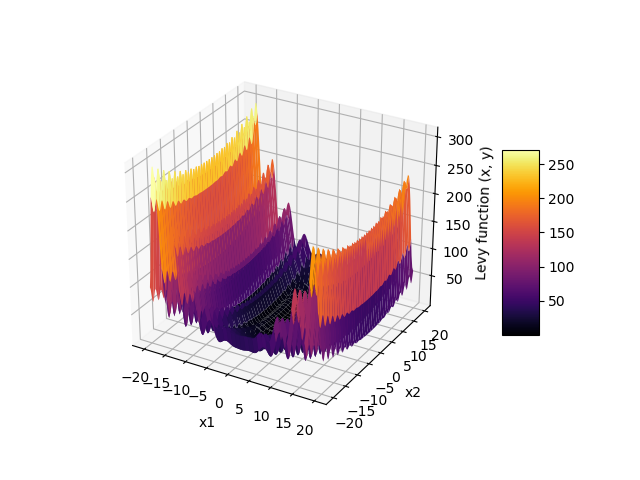

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-20, 20, 0.25)
y = np.arange(-20, 20, 0.25)
x, y = np.meshgrid(x, y)
z = np.array([-obj_func([x_z, y_z]) for x_z, y_z in zip(np.ravel(x), np.ravel(y))])
z = z.reshape(x.shape)
surf = ax.plot_surface(x, y, z, cmap='inferno', linewidth=0)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Levy function (x, y)')

fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

## Zadanie 3 (2pkt.)

Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

In [17]:
import math
import numpy as np
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


def nbits(a, b, dx):
    length = abs(b - a)/dx
    B = math.ceil(math.log(length, 2))

    tmp = 2**B
    dx_new = abs(b-a)/tmp

    return B, dx_new


def gen_population(P, N, B):
    population = np.ndarray(shape=(P, N * B), dtype="int")
    for i in range(P):
        for j in range(B * N):
            population[i][j] = np.random.randint(0, 2)


    return population

def to_decimal(ind, B):
    dec = sum([ind[-n-1]*(2**n) for n in range(B)])
    return dec

def decode_individual(individual, N, B, a, dx):
    decode_individual = np.array([(a+to_decimal(individual[n*B:n*B+B],B))*dx for n in range(len(individual)//B)])
    return decode_individual


def evaluate_population(func, pop, N, B, a, dx):
    evaluated_pop = np.array([func(decode_individual(i, N, B, a, dx)) for i in pop])
    return evaluated_pop

def get_best(pop, evaluated_pop):
    best_value = np.amax(evaluated_pop)
    best_individual = np.array(pop[np.argmax(evaluated_pop)])
    return best_individual, best_value


def roulette(pop, evaluated_pop):
    if evaluated_pop.min() < 1:
        evaluated_pop += math.fabs(evaluated_pop.min()) + 1

    evaluated_pop = np.cumsum(evaluated_pop / evaluated_pop.sum())
    new_pop = np.ndarray(shape=np.shape(pop), dtype=np.float64)

    for i in range(len(pop)):
        j = 0
        r = np.random.random_sample()
        while evaluated_pop[j] < r:
            j += 1
        new_pop[i] = pop[j]

    return new_pop


def cross(pop, pk):
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    for i in range(0, len(pop) - 1, 2):
        if np.random.random() < pk:
            cross_p = len(pop[0]/2)
            for j in range(cross_p):
                new_pop[i][j] = pop[i][j]
                new_pop[i + 1][j] = pop[i + 1][j]
            for k in range(cross_p, len(pop[0])):
                new_pop[i][j] = pop[i + 1][j]
                new_pop[i + 1][j] = pop[i][j]
        else:
            new_pop[i] = pop[i]
            new_pop[i + 1] = pop[i + 1]
        if len(pop) % 2 == 1:
            new_pop[len(pop) - 1] = pop[len(pop) - 1]
    return new_pop


def mutate(pop, pm):
    new_pop = np.array([[not (x) if np.random.random_sample() < pm else x for x in pop[i]] for i in range(len(pop))])
    return new_pop

def obj_func(x):
    w1 = 1 + (x[0]-1)/4
    w2 = 1 + (x[1] - 1) / 4

    sum = (w1 - 1)**2 * (1 + 10 * math.sin(math.pi * w1 + 1)**2)

    return -(math.sin(math.pi * w1)**2 + sum + (w2 - 1)**2 * (1 + math.sin(2 * math.pi * w2)**2))


def genetic_evolution(fun, pop_size, pk, pm, generations, dx, plot):
    N = 2
    B, dx = nbits(-10, 10, dx)
    pop = gen_population(pop_size, 2, B)
    best_generation = 1
    list_best = []
    list_best_generation = []
    list_mean = []
    evaluated_pop = evaluate_population(fun, pop, 2, B, -10, dx)
    best_sol = get_best(pop, evaluated_pop)

    first_pop_sol = np.apply_along_axis(decode_individual, 1, pop, N, B, -10, dx)
    first_pop_eval = np.copy(evaluated_pop)

    for i in range(2, generations + 1):
        pop = roulette(pop, evaluated_pop)
        pop = cross(pop, pk)
        pop = mutate(pop, pm)

        evaluated_pop = evaluate_population(fun, pop, 2, B, -10, dx)
        best_sol_temp = get_best(pop, evaluated_pop)

        list_best_generation.append(-best_sol_temp[1])
        list_mean.append(np.mean(-evaluated_pop))

        if best_sol_temp[1] > best_sol[1]:
            best_sol = best_sol_temp
            best_generation = i

        list_best.append(-best_sol[1])

        if i == generations // 2:
            mid_pop_sol = np.apply_along_axis(decode_individual, 1, pop, N, B, -10, dx)
            mid_pop_eval = np.copy(evaluated_pop)

        if i == generations:
            last_pop_sol = np.apply_along_axis(decode_individual, 1, pop, N, B, -10, dx)
            last_pop_eval = np.copy(evaluated_pop)

    best_x, best_y = decode_individual(best_sol[0], 2, B, -10, dx)
    best_z = best_sol[1]



    if plot:    
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = np.arange(-20, 20, 0.25)
        y = np.arange(-20, 20, 0.25)
        x, y = np.meshgrid(x, y)
        z = np.array([-obj_func([x_z, y_z]) for x_z, y_z in zip(np.ravel(x), np.ravel(y))])
        z = z.reshape(x.shape)
        surf = ax.plot_surface(x, y, z, cmap='Blues', linewidth=0)

        ax.scatter(-first_pop_sol.T[0], -first_pop_sol.T[1], -first_pop_eval, label='First Gen', c="b")
        ax.scatter(-mid_pop_sol.T[0], -mid_pop_sol.T[1], -mid_pop_eval, label='Mid Gen', c="g")
        ax.scatter(-last_pop_sol.T[0], -last_pop_sol.T[1], -last_pop_eval, label='Last Gen', c="r")


        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Levy function (x, y)')
        ax.legend()

        fig.colorbar(surf, shrink=0.5, aspect=5)

        plt.show()
    
    return best_sol, best_generation, list_best, list_best_generation, list_mean

## Zadnie 4 (1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

<IPython.core.display.Javascript object>


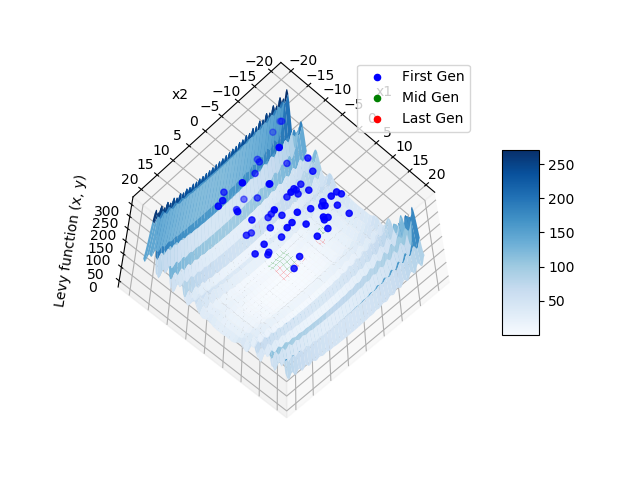

(array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1]), -0.0004538782309440264)


<IPython.core.display.Javascript object>


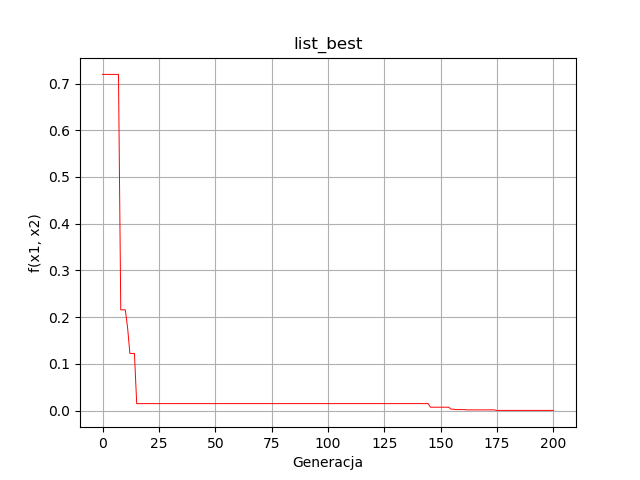

<IPython.core.display.Javascript object>


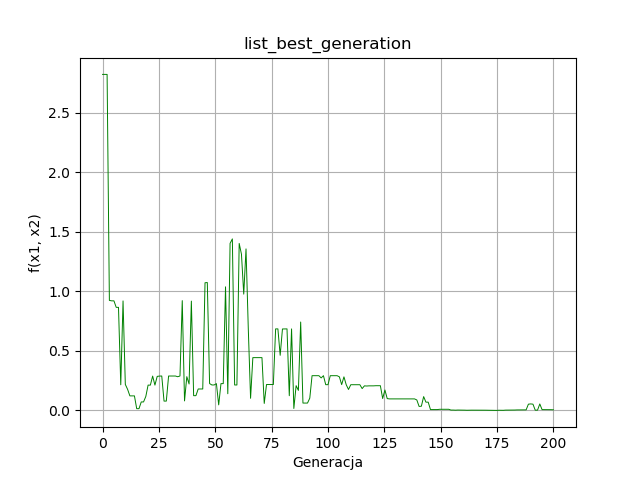

<IPython.core.display.Javascript object>


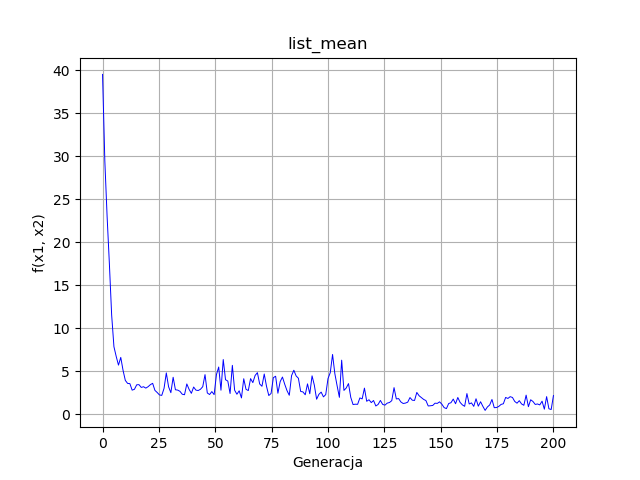

In [18]:
best_sol, best_generation, list_best, list_best_generation, list_mean = genetic_evolution(obj_func, 60, 0.7, 0.01, 200, 1e-10, True)
print(best_sol)


x = np.linspace(0, 200, 199)
y1 = list_best 
y2 = list_best_generation 
y3 = list_mean

fig, ax = plt.subplots()
ax.plot(x, y1, lw=0.7, c='r')
ax.set_title('list_best')
ax.set_xlabel('Generacja')
ax.set_ylabel('f(x1, x2)')
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(x, y2, lw=0.7, c='g')
ax.set_title('list_best_generation')
ax.set_xlabel('Generacja')
ax.set_ylabel('f(x1, x2)')
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(x, y3, lw=0.7, c='b')
ax.set_title('list_mean')
ax.set_xlabel('Generacja')
ax.set_ylabel('f(x1, x2)')
plt.grid()
plt.show()

## Zadanie 5 (5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

In [21]:
import pandas as pd

exec_num = 10 # lub więcej

#zad. 1
pop_size = 60 #wielkosc populacji
pk = 0.7 #prawdopodobienstwo krzyzowania
pm = 0.01 #prawdopodobienstwo mutacji
generations = 200 # ilość generacji
dx = 1e-10 #krok

#zad. 2
generations_2 = [100, 500, 1000, 5000, 10000]

#zad. 3
pm3 = 0.0

#zad. 4
pk4 = 0.0

#zad. 5
pop_size_5 = [20, 100]
generations_5 = [100, 20]

df_zad1 = pd.DataFrame()
df_zad2 = [pd.DataFrame() for _ in range(len(generations_2))]
    
df_zad3 = pd.DataFrame()
df_zad4 = pd.DataFrame()
df_zad5_populacja = pd.DataFrame()
df_zad5_generacje = pd.DataFrame()

for i in range(exec_num):
    ev1 = genetic_evolution(obj_func, pop_size, pk, pm, generations, dx, False)
    df_zad1 = df_zad1.append(pd.DataFrame([[ ev1[0][1], ev1[1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )
    
    ev2 = []
    for j in range(len(generations_2)):
        ev2.append(genetic_evolution(obj_func, pop_size, pk, pm, generations_2[j], dx, False) )
        df_zad2[j] = df_zad2[j].append( pd.DataFrame([[ ev2[j][0][1], ev2[j][1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )
    
    ev3 = genetic_evolution(obj_func, pop_size, pk, pm3, generations, dx, False)
    df_zad3 = df_zad3.append( pd.DataFrame([[ ev3[0][1], ev3[1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )
    
    ev4 = genetic_evolution(obj_func, pop_size, pk4, pm, generations, dx, False)
    df_zad4 = df_zad4.append( pd.DataFrame([[ ev4[0][1], ev4[1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )
    
    ev5 = []
    ev5.append(genetic_evolution(obj_func, pop_size_5[0], pk, pm, generations_5[0], dx, False) )
    df_zad5_populacja = df_zad5_populacja.append( pd.DataFrame([[ ev5[0][0][1], ev5[0][1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )
    
    ev5.append(genetic_evolution(obj_func, pop_size_5[1], pk, pm, generations_5[1], dx, False) )
    df_zad5_generacje = df_zad5_generacje.append( pd.DataFrame([[ ev5[1][0][1], ev5[1][1] ]], columns=["Przystosowanie", "Najlepsza generacja"], index=[i] ) )


print('1. Ustawienia standardowe')
table = pd.DataFrame([[df_zad1.mean()[0], df_zad1.std()[0], df_zad1.mean()[1], df_zad1.std()[1]]], columns=['Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'])
display(table)

print('2. Różne liczby generacji')
table = pd.DataFrame()
for i in range(len(generations_2)):
    table = table.append(pd.DataFrame([[generations_2[i], df_zad2[i].mean()[0], df_zad2[i].std()[0], df_zad2[i].mean()[1], df_zad1.std()[1]]], columns=['Liczba generacji', 'Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'], index=[i]) )
display(table)

print('3. Bez mutacji')
table = pd.DataFrame([[df_zad3.mean()[0], df_zad3.std()[0], df_zad3.mean()[1], df_zad3.std()[1]]], columns=['Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'])
display(table)

print('4. Bez krzyzowania')
table = pd.DataFrame([[df_zad4.mean()[0], df_zad4.std()[0], df_zad4.mean()[1], df_zad4.std()[1]]], columns=['Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'])
display(table)

print('5. Dluzsza ewolucja krotszej populacji vs krotsza ewolucja wiekszej populacji')
table = pd.DataFrame([[df_zad5_populacja.mean()[0], df_zad5_populacja.std()[0], df_zad5_populacja.mean()[1], df_zad5_populacja.std()[1]]], columns=['Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'], index=['pop=20 gen=100'])
table = table.append(pd.DataFrame([[df_zad5_generacje.mean()[0], df_zad5_generacje.std()[0], df_zad5_generacje.mean()[1], df_zad5_generacje.std()[1]]], columns=['Średnia wartość','Odchylenie od wartości','Średnia generacja','Odchylenie od generacji'], index=['pop=100 gen=20']) )
display(table)

1. Ustawienia standardowe


,Średnia wartość,Odchylenie od wartości,Średnia generacja,Odchylenie od generacji
0,-0.001406,0.001745,126.6,57.900681


2. Różne liczby generacji


,Liczba generacji,Średnia wartość,Odchylenie od wartości,Średnia generacja,Odchylenie od generacji
0,100,-0.019877,0.025026,62.9,57.900681
1,500,-0.000494,0.001022,317.0,57.900681
2,1000,-0.000154,0.000155,477.7,57.900681
3,5000,-0.000031,0.000031,2206.6,57.900681
4,10000,-0.000008,0.000008,2048.6,57.900681


3. Bez mutacji


,Średnia wartość,Odchylenie od wartości,Średnia generacja,Odchylenie od generacji
0,-0.824903,0.638822,1.0,0.0


4. Bez krzyzowania


,Średnia wartość,Odchylenie od wartości,Średnia generacja,Odchylenie od generacji
0,-0.001772,0.003112,147.4,40.423316


5. Dluzsza ewolucja krotszej populacji vs krotsza ewolucja wiekszej populacji


,Średnia wartość,Odchylenie od wartości,Średnia generacja,Odchylenie od generacji
pop=20 gen=100,-0.016033,0.031183,72.8,26.088737
pop=100 gen=20,-0.089408,0.061234,11.0,7.226494


UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

1. Globalne minimum zadanej funkcji wynosi 0 dla x1, x2 = 1. Przy zastosowaniu typowych parametrów algorytmu genetycznego otrzymany wynik jest bardzo zbliżony do wyniku rzeczywistego (dokładność rzędu 1e-3)
2. Można zauważyć, że wraz ze wzrotem ilości generacji dokładność wyniku jest coraz większa, a odchylenie standardowe coraz mniejsze. Widać również że najlepsze rozwiązanie zazwyczaj znajduje się w okolicy połowy ilości generacji. Używanie algorytmu z bardzo dużą liczbą generacji jest nieopłacalne - niewielki wzrost dokładności obliczeń okupiony jest dużym zwiększeniem czasu wykonywania się algorytmu.
3. Przy braku mutacji najlepsze rozwiązanie odnajdywane jest szybko; jego dokładność jednak jest o wiele mniejsza niż w przypadku wykorzystania mutacji.
4. Przy braku krzyżowania widzimy że otrzymujemy dość dokładne rozwiązanie, jednak wolniej niż gdybyśmy tego mechanizmu używali.
5. Dla zadanych parametrów oraz funkcji trudno określić która metoda jest lepsza - ewoluując mniejszą populacjędłużej otrzymamy większą dokładność, jednak później niż w odwrotnym przypadku. Również odchylenie od generacji będzie wtedy większe.

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>